In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv3D, Conv2D, Conv1D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

In [ ]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input

image_size = 128

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

data_generator_no_aug = ImageDataGenerator(
                                    preprocessing_function=preprocess_input
                                    )

train_generator = data_generator_with_aug.flow_from_directory(
        '<DATA_PATH>',
        target_size=(image_size, image_size),
        batch_size=200,
        class_mode='categorical')

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = data_generator_no_aug.flow_from_directory(
        '<DATA_PATH>',
        target_size=(image_size, image_size),
        class_mode='categorical')

# Fit Model Here
my_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=1)

# Image Generator

In [ ]:
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

train_generator = data_generator_with_aug.flow_from_directory(
        '../input/urban-and-rural-photos/rural_and_urban_photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = data_generator_no_aug.flow_from_directory(
        '../input/urban-and-rural-photos/rural_and_urban_photos/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

In [12]:
X = []
X.extend(fake_imfile_list)
X.extend(real_imfile_list)

In [13]:
len(X)

718

In [14]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.996078,0.886275,0.792157,0.847059,0.705882,0.650980,0.454902,0.298039,0.258824,0.349020,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992157,0.890196,0.792157,0.850980,0.709804,0.654902,0.454902,0.298039,0.250980,0.349020,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.368627,0.368627,0.376471,0.372549,0.372549,0.380392,0.364706,0.364706,0.372549,0.372549,...,0.086275,0.113725,0.117647,0.094118,0.117647,0.121569,0.098039,0.117647,0.121569,0.098039
3,0.368627,0.368627,0.376471,0.376471,0.376471,0.384314,0.364706,0.364706,0.372549,0.372549,...,0.086275,0.113725,0.125490,0.098039,0.109804,0.117647,0.098039,0.109804,0.117647,0.098039
4,0.482353,0.329412,0.168627,0.474510,0.321569,0.168627,0.380392,0.247059,0.098039,0.400000,...,0.227451,0.254902,0.286275,0.368627,0.666667,0.662745,0.682353,0.717647,0.713725,0.745098
5,0.478431,0.333333,0.168627,0.470588,0.321569,0.168627,0.388235,0.258824,0.098039,0.403922,...,0.227451,0.250980,0.294118,0.372549,0.674510,0.674510,0.682353,0.733333,0.737255,0.756863
6,0.776471,0.772549,0.764706,0.776471,0.772549,0.764706,0.788235,0.784314,0.776471,0.776471,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.776471,0.772549,0.764706,0.776471,0.772549,0.764706,0.788235,0.784314,0.776471,0.776471,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.470588,0.360784,0.450980,0.454902,0.329412,0.423529,0.462745,0.349020,0.435294,0.501961,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,0.470588,0.360784,0.450980,0.454902,0.329412,0.423529,0.466667,0.352941,0.439216,0.498039,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Add Y

In [15]:
Y = []
for i in range(len(fake_imfile_list)):
    Y.append(1)
for i in range(len(real_imfile_list)):
    Y.append(0)

In [16]:
Y = to_categorical(Y, num_classes=2)

In [17]:
Y.shape

(718, 2)

# Reshape X

In [19]:
X = X.values.reshape(-1, 128, 128, 3)

In [20]:
X.shape

(718, 128, 128, 3)

## Train Test Split

In [21]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [22]:
X_val

array([[[[0.15294118, 0.15294118, 0.16078431],
         [0.08235294, 0.0745098 , 0.08627451],
         [0.07843137, 0.07058824, 0.08235294],
         ...,
         [0.24705882, 0.20392157, 0.22745098],
         [0.2       , 0.15686275, 0.18039216],
         [0.19215686, 0.16862745, 0.18431373]],

        [[0.19215686, 0.18431373, 0.19607843],
         [0.11764706, 0.09803922, 0.11372549],
         [0.09803922, 0.09019608, 0.10196078],
         ...,
         [0.25490196, 0.21960784, 0.23921569],
         [0.21960784, 0.18431373, 0.20392157],
         [0.21568627, 0.19215686, 0.20784314]],

        [[0.20784314, 0.2       , 0.21960784],
         [0.11764706, 0.09803922, 0.11372549],
         [0.12941176, 0.10980392, 0.1254902 ],
         ...,
         [0.20784314, 0.18823529, 0.20392157],
         [0.19607843, 0.17647059, 0.2       ],
         [0.2       , 0.18431373, 0.18823529]],

        ...,

        [[0.15686275, 0.14901961, 0.15294118],
         [0.02352941, 0.00784314, 0.        ]

# Model

In [23]:
model = Sequential()

model.add(Conv2D(filters = 30, kernel_size = (5, 5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3), strides = 2))
model.add(MaxPool2D(pool_size=(2, 2), strides = 2))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides = 2))

model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'Same', 
                activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'Same', 
                activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'Same', 
                activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'Same', 
                activation = 'relu'))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [24]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [25]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [27]:
epochs = 500
batch_size = 100

In [28]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 646 samples, validate on 72 samples
Epoch 1/500
 - 16s - loss: 0.8347 - acc: 0.4985 - val_loss: 0.6929 - val_acc: 0.5417
Epoch 2/500
 - 0s - loss: 0.6928 - acc: 0.4938 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 3/500
 - 0s - loss: 0.6916 - acc: 0.5418 - val_loss: 0.6851 - val_acc: 0.5278
Epoch 4/500
 - 0s - loss: 0.7171 - acc: 0.5650 - val_loss: 0.6912 - val_acc: 0.5556
Epoch 5/500
 - 0s - loss: 0.6757 - acc: 0.5898 - val_loss: 0.6758 - val_acc: 0.5833
Epoch 6/500
 - 0s - loss: 0.6631 - acc: 0.6084 - val_loss: 0.7485 - val_acc: 0.5417
Epoch 7/500
 - 0s - loss: 0.6838 - acc: 0.5728 - val_loss: 0.6826 - val_acc: 0.5556
Epoch 8/500
 - 0s - loss: 0.6491 - acc: 0.6223 - val_loss: 0.6557 - val_acc: 0.5833
Epoch 9/500
 - 0s - loss: 0.6352 - acc: 0.6300 - val_loss: 0.6528 - val_acc: 0.5556
Epoch 10/500
 - 0s - loss: 0.6434 - acc: 0.6176 - val_loss: 0.6491 - val_acc: 0.6250
Epoch 11/500
 - 0s - loss: 0.6280 - acc: 0.6656 - val_loss: 0.6697 - val_acc: 0.6389
Epoch 12/500
 - 0s - loss: 0

Epoch 97/500
 - 0s - loss: 5.1255e-04 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 98/500
 - 0s - loss: 4.2696e-04 - acc: 1.0000 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 99/500
 - 0s - loss: 2.3585e-04 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 100/500
 - 0s - loss: 7.0205e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 101/500
 - 0s - loss: 1.1645e-04 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 102/500
 - 0s - loss: 3.3062e-05 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 103/500
 - 0s - loss: 2.0322e-05 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 104/500
 - 0s - loss: 3.1974e-05 - acc: 1.0000 - val_loss: 0.0166 - val_acc: 0.9861
Epoch 105/500
 - 0s - loss: 0.7036 - acc: 0.9040 - val_loss: 0.2241 - val_acc: 0.9444
Epoch 106/500
 - 0s - loss: 0.0079 - acc: 0.9954 - val_loss: 0.1605 - val_acc: 0.9722
Epoch 107/500
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1487 - val_acc: 0.9722
Epoch 108/500
 - 0s - los

Epoch 189/500
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 2.5868e-05 - val_acc: 1.0000
Epoch 190/500
 - 0s - loss: 0.0303 - acc: 0.9923 - val_loss: 2.0210e-04 - val_acc: 1.0000
Epoch 191/500
 - 0s - loss: 8.4937e-04 - acc: 1.0000 - val_loss: 1.2960e-05 - val_acc: 1.0000
Epoch 192/500
 - 0s - loss: 7.0219e-04 - acc: 1.0000 - val_loss: 3.3975e-06 - val_acc: 1.0000
Epoch 193/500
 - 0s - loss: 8.7724e-05 - acc: 1.0000 - val_loss: 2.0556e-06 - val_acc: 1.0000
Epoch 194/500
 - 0s - loss: 7.5031e-05 - acc: 1.0000 - val_loss: 8.3976e-05 - val_acc: 1.0000
Epoch 195/500
 - 0s - loss: 4.4419e-05 - acc: 1.0000 - val_loss: 3.3662e-06 - val_acc: 1.0000
Epoch 196/500
 - 0s - loss: 2.2945e-05 - acc: 1.0000 - val_loss: 1.4247e-06 - val_acc: 1.0000
Epoch 197/500
 - 0s - loss: 5.0134e-06 - acc: 1.0000 - val_loss: 1.2799e-06 - val_acc: 1.0000
Epoch 198/500
 - 0s - loss: 3.0832e-05 - acc: 1.0000 - val_loss: 3.5018e-07 - val_acc: 1.0000
Epoch 199/500
 - 0s - loss: 4.6278e-06 - acc: 1.0000 - val_loss: 3.1

Epoch 278/500
 - 0s - loss: 2.2467e-07 - acc: 1.0000 - val_loss: 1.8047e-07 - val_acc: 1.0000
Epoch 279/500
 - 0s - loss: 8.9962e-07 - acc: 1.0000 - val_loss: 1.4073e-07 - val_acc: 1.0000
Epoch 280/500
 - 0s - loss: 1.9081e-07 - acc: 1.0000 - val_loss: 1.6308e-07 - val_acc: 1.0000
Epoch 281/500
 - 0s - loss: 0.1332 - acc: 0.9799 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 282/500
 - 0s - loss: 0.0219 - acc: 0.9907 - val_loss: 4.7262e-05 - val_acc: 1.0000
Epoch 283/500
 - 0s - loss: 2.5727e-04 - acc: 1.0000 - val_loss: 6.6642e-07 - val_acc: 1.0000
Epoch 284/500
 - 0s - loss: 2.3442e-06 - acc: 1.0000 - val_loss: 5.7370e-07 - val_acc: 1.0000
Epoch 285/500
 - 0s - loss: 1.3585e-05 - acc: 1.0000 - val_loss: 5.5714e-07 - val_acc: 1.0000
Epoch 286/500
 - 0s - loss: 1.2845e-05 - acc: 1.0000 - val_loss: 4.2717e-07 - val_acc: 1.0000
Epoch 287/500
 - 0s - loss: 3.0386e-06 - acc: 1.0000 - val_loss: 4.1641e-07 - val_acc: 1.0000
Epoch 288/500
 - 0s - loss: 2.9498e-06 - acc: 1.0000 - val_loss: 3.2038e

Epoch 367/500
 - 1s - loss: 1.0708e-06 - acc: 1.0000 - val_loss: 1.2666e-07 - val_acc: 1.0000
Epoch 368/500
 - 1s - loss: 3.7812e-06 - acc: 1.0000 - val_loss: 1.2666e-07 - val_acc: 1.0000
Epoch 369/500
 - 1s - loss: 8.6474e-07 - acc: 1.0000 - val_loss: 1.2418e-07 - val_acc: 1.0000
Epoch 370/500
 - 1s - loss: 1.7787e-06 - acc: 1.0000 - val_loss: 1.2500e-07 - val_acc: 1.0000
Epoch 371/500
 - 1s - loss: 2.3580e-05 - acc: 1.0000 - val_loss: 1.2832e-07 - val_acc: 1.0000
Epoch 372/500
 - 1s - loss: 2.8945e-07 - acc: 1.0000 - val_loss: 1.2749e-07 - val_acc: 1.0000
Epoch 373/500
 - 1s - loss: 7.1830e-07 - acc: 1.0000 - val_loss: 1.2583e-07 - val_acc: 1.0000
Epoch 374/500
 - 1s - loss: 3.7369e-07 - acc: 1.0000 - val_loss: 1.2252e-07 - val_acc: 1.0000
Epoch 375/500
 - 1s - loss: 2.9360e-07 - acc: 1.0000 - val_loss: 1.2086e-07 - val_acc: 1.0000
Epoch 376/500
 - 1s - loss: 1.4440e-07 - acc: 1.0000 - val_loss: 1.2004e-07 - val_acc: 1.0000
Epoch 377/500
 - 1s - loss: 2.1858e-07 - acc: 1.0000 - val_l

 - 0s - loss: 3.1180e-06 - acc: 1.0000 - val_loss: 2.5415e-07 - val_acc: 1.0000
Epoch 456/500
 - 0s - loss: 1.2852e-05 - acc: 1.0000 - val_loss: 2.1358e-07 - val_acc: 1.0000
Epoch 457/500
 - 0s - loss: 1.2165e-05 - acc: 1.0000 - val_loss: 1.8709e-07 - val_acc: 1.0000
Epoch 458/500
 - 0s - loss: 8.2012e-05 - acc: 1.0000 - val_loss: 1.3163e-07 - val_acc: 1.0000
Epoch 459/500
 - 0s - loss: 8.4104e-07 - acc: 1.0000 - val_loss: 1.2832e-07 - val_acc: 1.0000
Epoch 460/500
 - 0s - loss: 0.1384 - acc: 0.9799 - val_loss: 6.2171e-07 - val_acc: 1.0000
Epoch 461/500
 - 0s - loss: 4.2960e-04 - acc: 1.0000 - val_loss: 2.0779e-07 - val_acc: 1.0000
Epoch 462/500
 - 0s - loss: 3.1888e-06 - acc: 1.0000 - val_loss: 1.9123e-07 - val_acc: 1.0000
Epoch 463/500
 - 0s - loss: 1.8524e-05 - acc: 1.0000 - val_loss: 2.4587e-07 - val_acc: 1.0000
Epoch 464/500
 - 0s - loss: 1.6848e-06 - acc: 1.0000 - val_loss: 2.2021e-07 - val_acc: 1.0000
Epoch 465/500
 - 0s - loss: 5.9086e-06 - acc: 1.0000 - val_loss: 1.8047e-07 - 

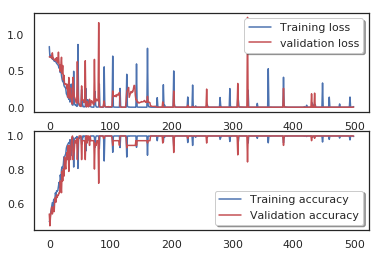

In [29]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

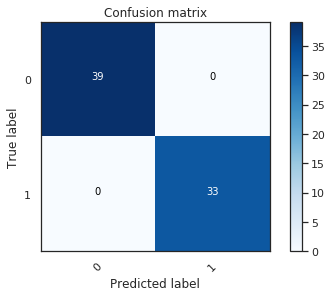

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 
